# Project 3: Trees and Forests with Scikit-Learn

### Names: Keiran Berry
### Course Level: Undergraduate

**Introduction:**
* In this project, we explore a problem in optical character recognition (OCR) by classifying the MNIST digit dataset.

<u>**Note:** The project will be graded by me running your notebook from top to bottom (choosing the "run all" option) - if it errors out at any point - this is where I stop grading and you'll lose ALL points after the error - Even if they are correct!</u>

* <u>Moral of the story is, **Make sure your entire notebook executes from top to bottom and you're happy with the results BEFORE you submit to the drop box!**</u>

**Objectives:**
* The objective of this project is to use scikit-learn to investigate tree-based classifiers and evaluate their performance on OCR.

# Let's grab the data and have a look at the dataset

## All Students

**Problem A (100pts)**

1 (20pts). Let's grab the data from openml and look at a few of the digits

* Note: a description of the dataset can be found [Here](https://www.openml.org/search?type=data&status=active&id=554)
* Note: The targets are labeled [0,1,2....]
* **Create 2 x 5 grid of digits where one digit from each class is displayed**
    - see plt.imshow() for details on displaying images (use the cmap='Greys' option)
    - see .reshape() to see how to convert your images from a vector to a 28 x 28 image

* <u><b>Questions:</b> How many features are there per observation? What do these features represent? How many classes? How many observations are in the data?</u>

* Your plot should look something like this:

<img src="Figures/MNIST_All.png" alt="MNIST Digits" style="width:500px;"/>

In [7]:
# Import needed libraries (numpy, openml, etc.) #
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

# Print the shapes of the training set and associated labels #
print("Shape of training set: ", X.shape)
print("Shape of labels: ", y.shape)

# Note: Image pixels are generally [0,255], let's rescale them to be [-1,1] #
# Doesn't really matter with tree-based methods but still a good habit #
X = X / 127.5 # this should change our range to be from 0 to 2
X = X - 1 # this changes our range from -1 to 1


Shape of training set:  (70000, 784)
Shape of labels:  (70000,)


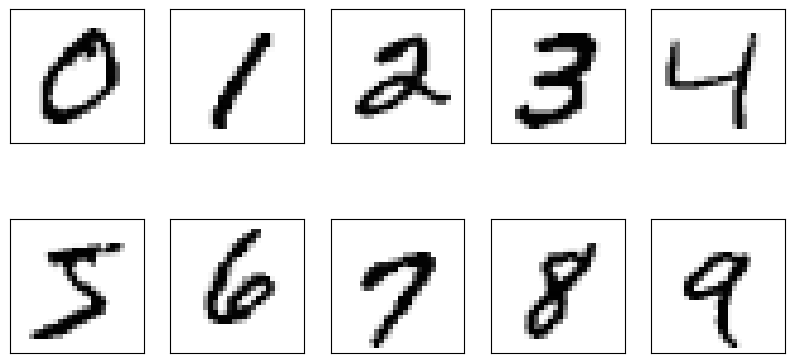

In [8]:
# Let's have a look at a few of the digits #
# Create a 2 x 5 subplot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

uniqueLabels = np.unique(y)
for i, label in enumerate(uniqueLabels):
    index = np.where(y == label)[0][0] # find the first occurrence of the label so we can use that index in X
    
    ax = axes[i // 5, i % 5]  # integer division by 5 gives row 0-1, mod 5 gives column 0-4
    ax.imshow(X[index].reshape(28, 28), cmap="Greys") # using imshow and reshape
    ax.set_xticks([]) # remove ticks so that it is the same as the example
    ax.set_yticks([]) 
plt.show()



## Problem A.1 Discussion:
* There are 784 features per observation. After some short research, I found that this is because there are 784 pixels total in a 28x28 image. This is obviously also related to the fact that the dataset is called mnist_784.
* These features each represent a pixel in the overall image.
* There are 10 unique classes in this dataset. I inferred this based on the fact that there are 10 digits total, 0 through 9, but using np.unique() in order to show images of each confirms that.
* There are 70,000 observations in the dataset.

2 (20pts). Now let's see how much variation there is between the digits

* Write a code chunk to display a 25 x 25 grid of images where the user selects what digit they want to see

* <u><b>Questions:</b> Do all the digits look the same?  What digits have the most variability (and as a result might be difficult to classify?)</u>

* Your plot should look something like this for the digit=5:

<img src="Figures/MNIST_Five.png" alt="MNIST Digits" style="width:500px;"/>

Enter the digit you want to see (0-9):  4


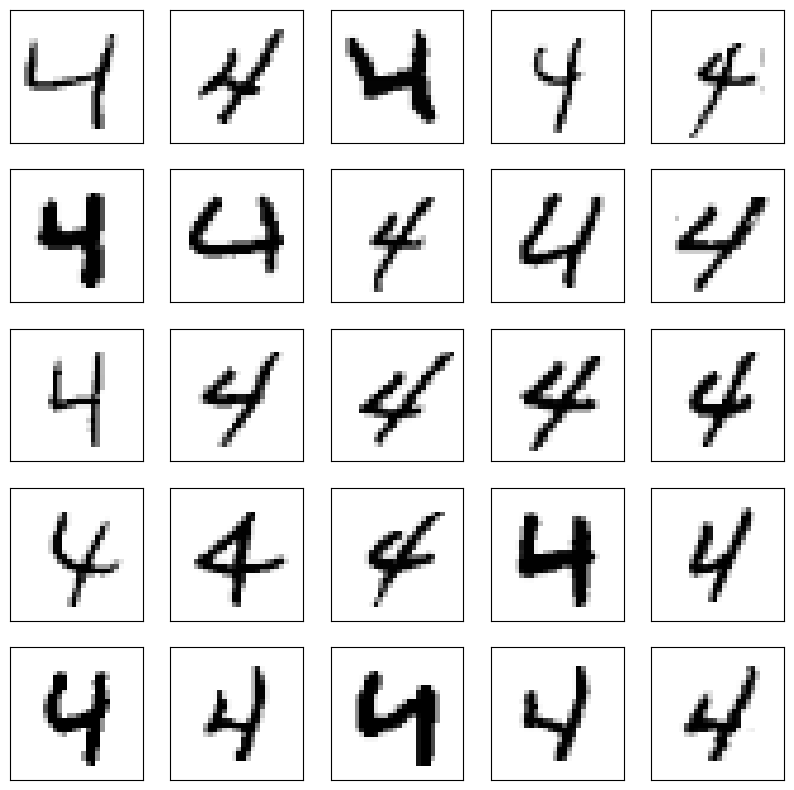

In [11]:
# Let's look at the variations between a single digit (0-9) #
# Plot 25 different observations from a digit of your choice #
digit = int(input("Enter the digit you want to see (0-9): ")) # letting the user select digit as mentioned above
indices = np.where(y == digit)[0][:25] # get the indices of the first 25 instances of that digit 

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# same basic printing logic as before
for i, index in enumerate(indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(X[index].reshape(28, 28), cmap="Greys")
    
    ax.set_xticks([])  
    ax.set_yticks([])

plt.show()


## Problem A.2 Discussion:
* Not all of the digits look the same. There are multiple different ways to write each number, and even though we as humans have a reasonably easy time identifying them, some of them look similar. For example, there is a 9 with a curved bottom which I could even see being an 8.
* The numbers which I notice with the most variability are 1, 5, and 7. There are a couple of 1's with the lines on the top and bottom, and a couple of 7's with a bit of an overhang on the top or a line through the middle. I could see these getting confused with each other. 5's are somewhat all over the place, so I could see them being mistaken for just about anything.

## Let's get the data ready for building a classifier

3 (30pts). Using the train_test_split in sklearn, split the dataset into a training set and testing set

* It's common for MNIST to train on 60k digits and test on 10k digits
* Be sure to use stratificaiton and random state
* <u> Discuss how well the classifier works, training time for different IG metrics, depth, etc.</u>

### Once the data is ready, let's build the tree
* Using sklearn, build a tree classifier on the training data
    - Start with a max depth of 5 and slowly work up to see how it effects the classification accuracy
    - Be sure to **plot the actual tree and print the classification report**
    - Finally, write a script to randomly grab a test image, and have your tree do a prediction:
        - Create a 2 x 6 grid of images where the top row is the test image, and directly below is what your classifier predicted (this can be the first image coorisponding to the predicted label)

* Your tree should look something like this:

<img src="Figures/Tree.png" alt="Depth = 5 Tree" style="width:500px;"/>

* Your predictions should look like this:

<img src="Figures/Predictions.png" alt="Different Tree Predictions" style="width:500px;"/>

In [14]:
# Let's split the dataset into training/testing #
# It's common for MNIST to use 60k digits for training and 10k digits for testing #
from sklearn.model_selection import train_test_split
# Split the data into training vs. testing #
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 10000, train_size = 60000, stratify = y, random_state = 1)

# optional to free up some memory by deleting non-used arrays:
del X, y


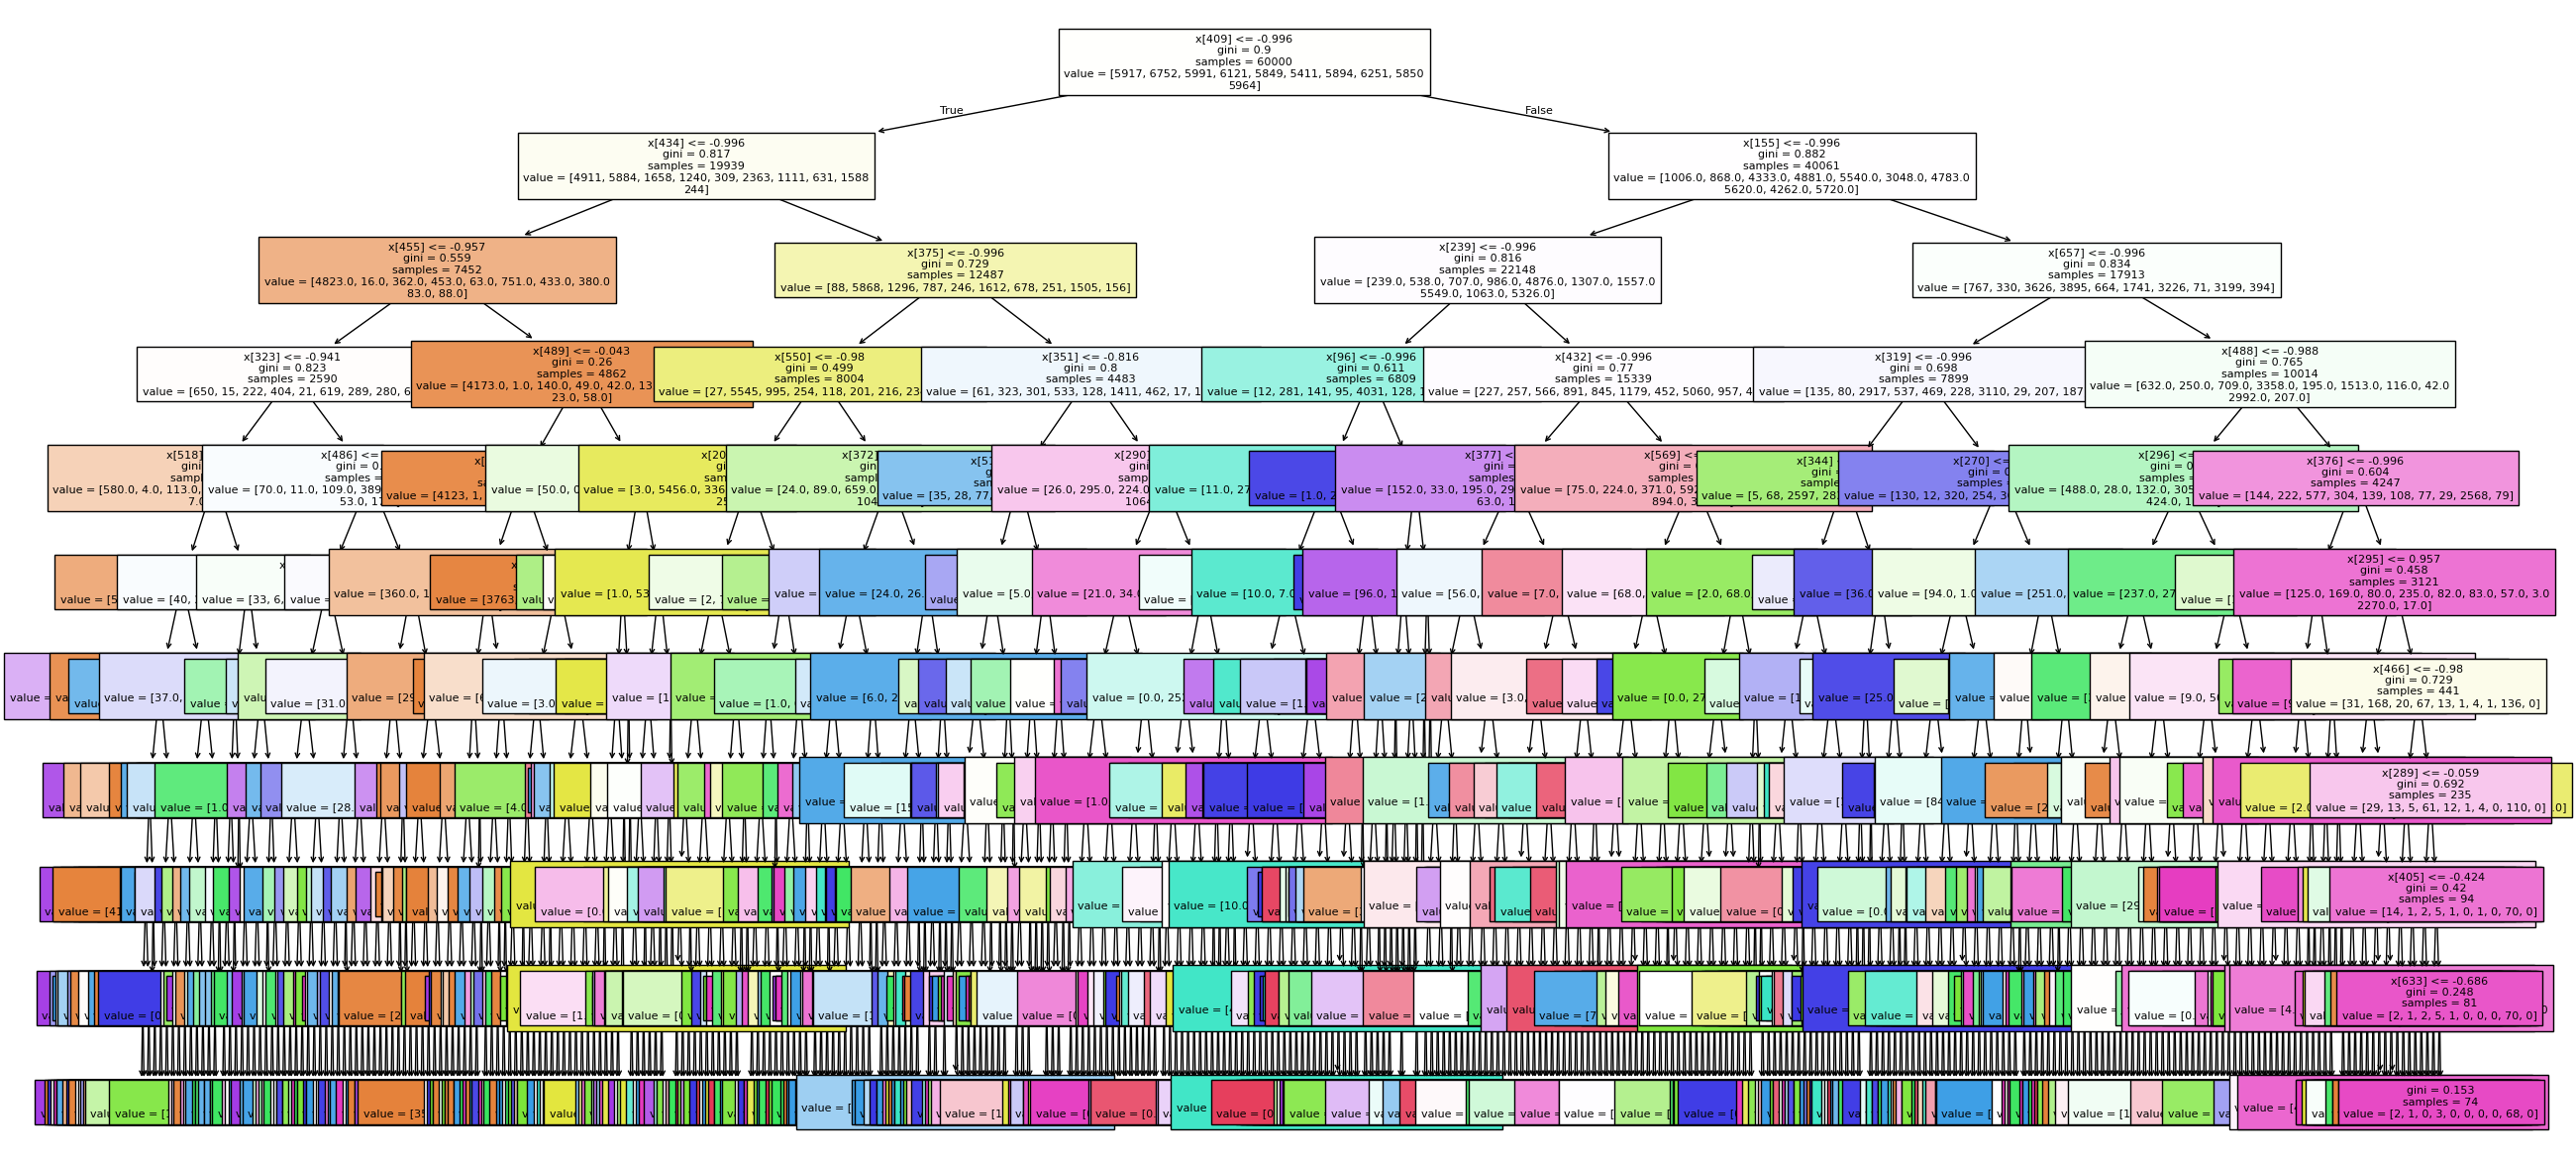

In [15]:
# Let's see if we can train a decision tree classifier for MNIST #
# Play with the depth of the tree, but realize the computational cost and overfitting comes at the expense of depth #
from sklearn.tree import *

treeClassifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 10) # starting with 5 and changing around
# 5: 68% accuracy, 10: 86% accuracy, 15: 88% (with gini)
# using depth of 10, gini is 86% accurate, entropy 87%, log-loss 87%
# training time for gini was 10.5s, entropy was 13.5s, log-loss 14s
# using depth 10 as it is seems like a medium with good accuracy but not overfitting like 15 seems to be

treeClassifier.fit(trainX, trainY)

# Make predictions on the test set
predictions = treeClassifier.predict(testX)

#printing the tree
plt.figure(figsize = (30, 15)) 
plot_tree(treeClassifier, filled = True, fontsize = 8) 
plt.show()

In [16]:
# Let's look at the predicition accuracy (note: we didn't use the scaled featurs - it's not important for this particular dataset #
# Get entire report of results #
from sklearn.metrics import classification_report

print("Test classification report:")
print(classification_report(testY, predictions))

# Predict for all samples #
allX = np.concatenate((trainX, testX), axis=0)
allY = np.concatenate((trainY, testY), axis=0)

allPredictions = treeClassifier.predict(allX)
print("All classification report:")
print(classification_report(allY, allPredictions))

Test classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       986
           1       0.94      0.94      0.94      1125
           2       0.84      0.83      0.84       999
           3       0.86      0.80      0.83      1020
           4       0.86      0.86      0.86       975
           5       0.83      0.79      0.81       902
           6       0.87      0.91      0.89       982
           7       0.86      0.91      0.89      1042
           8       0.79      0.78      0.78       975
           9       0.81      0.84      0.82       994

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

All classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6903
           1       0.96      0.95      0.95      7877
           2       0.90

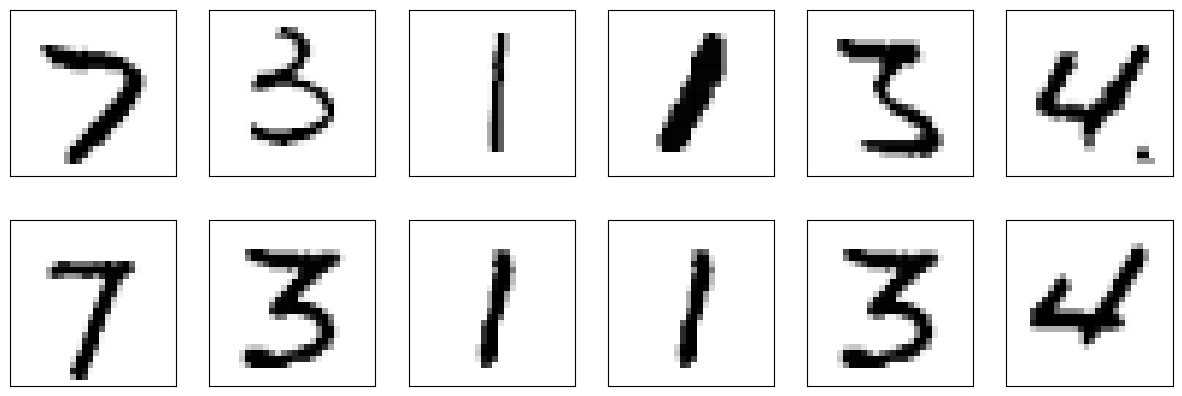

In [17]:
## Let's look at a couple predicted values vs. actual values #
## Plot a 2 x 6 subplot collection where the top row are random draws from X_test #
## and the bottom row is the predicted value (index into X_train for that predicted value) #

# Set up the subplot figure/axis #
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

# Loop through the test set to randomly grab an observation and do a prediction on that observation #
# Plot the observation on the top row and corresponding prediction below it #
randomIndices = np.random.choice(testX.shape[0], size = 6, replace = False) # 6 random numbers without replacement within the range of testX

testImages = testX[randomIndices]
predictions = treeClassifier.predict(testImages)

correspondingImages = []
for label in predictions:
    index = np.where(trainY == label)[0][0] # find first occurrence in trainY of the digit
    correspondingImages.append(trainX[index]) # append the image

# display test images
for i, ax in enumerate(axes[0]):
    ax.imshow(testImages[i].reshape(28, 28), cmap='Greys')
    ax.set_xticks([])  
    ax.set_yticks([])

# display predictions
for i, ax in enumerate(axes[1]):
    ax.imshow(correspondingImages[i].reshape(28, 28), cmap='Greys')
    ax.set_xticks([])  
    ax.set_yticks([])

plt.show()


## Problem A.3 Discussion:
* The classifier works impressively well, as an 86% classification rate on test data is incredible compared to the previous models seen in Programs 1 and 2. It seemed to get better with higher tree depth, but realistically it just seemed to be overtraining. 86% was about the best I could do when playing around with everything, and while 15 depth did seem better, it was getting almost 100% of the training data correct which led me to believe it was likely overtraining as the results of the test data did not change much from depth 10.
* The different information-gathering metrics had some variation in training time which I clocked using the time library (I have since removed the code to avoid unnecessary operations at runtime). I clocked the training for gini at 10.5 seconds, log-loss at 14 seconds, and entropy at 13.5 seconds. These were all comparable in the 86% to 87% classification rate range, so I have left the tree classifier using gini as it is the fastest to fit.
* As depth increased, training and predicting time went up exponentially. While training with depth 5 was relatively fast, and depth 10 is still reasonable, making the jump to depth 15 meant a ton of additional time, which makes sense. The number of nodes at any depth is $2^d$ where d is the depth. So, the more depth added, the more nodes, by a massive amount. With a depth of 15, the lowest depth on the tree has over 32,000 nodes. 

## Let's do all of the same things in problem A.3 but using a random forest classifier
### This may take some time so be weary about the number of trees you choose

4 (30pts). Using the above data, build a random forest classifier

* <u> Discuss how well the classifier works, training time for different IG metrics, depth, number of trees, and compare against a single tree etc.</u>
* **Don't forget to create the same plot where the top row is the test observation and the bottom row is the predicted digit**

In [20]:
# Build the random forest classifier #
# You can play with n_jobs depending on how many cores your system has #
# This parameter will parallelize the tree building #
from sklearn.ensemble import RandomForestClassifier

forestClassifier = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 10, n_jobs = 7) # half of my CPU's cores

#comparing depths with gini again, depth 5: 86%, depth 10: 95%, depth 15: 97%
#training times at depth 10: gini 5.25s, entropy 6.79s, log-loss 6.86s

forestClassifier.fit(trainX, trainY)

predictions = forestClassifier.predict(testX)

In [21]:
# Look at the classification report #
# Predict for all samples #
# Print the classification report
print("Test classification report:")
print(classification_report(testY, predictions))

allX = np.concatenate((trainX, testX), axis=0)
allY = np.concatenate((trainY, testY), axis=0)

allPredictions = forestClassifier.predict(allX)
print("All classification report:")
print(classification_report(allY, allPredictions))

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       986
           1       0.97      0.98      0.97      1125
           2       0.95      0.94      0.95       999
           3       0.94      0.93      0.94      1020
           4       0.95      0.95      0.95       975
           5       0.96      0.94      0.95       902
           6       0.96      0.98      0.97       982
           7       0.95      0.96      0.96      1042
           8       0.94      0.92      0.93       975
           9       0.90      0.92      0.91       994

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

All classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6903
           1       0.97      0.98      0.98      7877
           2       0.97

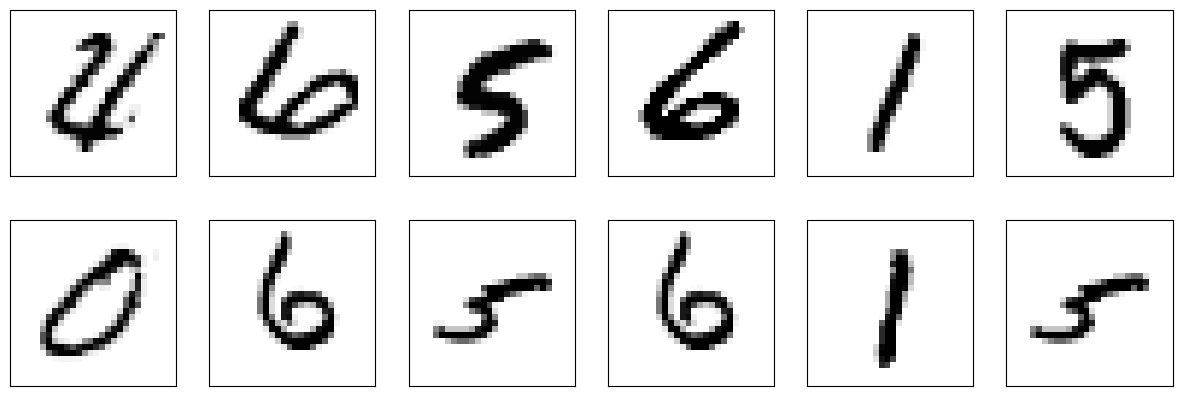

In [22]:
## Look at a couple predicted values vs. actual values #
## Plot a 2 x 6 subplot collection where the top row are random draws from X_test #
## and the bottom row is the predicted value (index into X_train for that predicted value) #

# Set up the subplot figure/axis #
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

# Loop through the test set to randomly grab an observation and do a prediction on that observation #
# Plot the observation on the top row and corresponding prediction below it #
randomIndices = np.random.choice(testX.shape[0], size = 6, replace = False) # 6 random numbers without replacement within the range of testX

testImages = testX[randomIndices]
predictions = forestClassifier.predict(testImages)

correspondingImages = []
for label in predictions:
    index = np.where(trainY == label)[0][0] # find first occurrence in trainY of the digit
    correspondingImages.append(trainX[index]) # append the image

# display test images
for i, ax in enumerate(axes[0]):
    ax.imshow(testImages[i].reshape(28, 28), cmap='Greys')
    ax.set_xticks([])  
    ax.set_yticks([])

# display predictions
for i, ax in enumerate(axes[1]):
    ax.imshow(correspondingImages[i].reshape(28, 28), cmap='Greys')
    ax.set_xticks([])  
    ax.set_yticks([])

plt.show()

## Problem A.4 Discussion:
* This classifier worked shockingly well. I figured that it would be the best I have tried so far, but I did not expect the results which it gave. With all three information-gathering metrics, the classification rate on the test data landed at right about 95%, which is incredible compared to the classifiers we have used in other projects.
* The training time for different metrics was actually much faster in the forest than in the single tree, which I did not expect. I used 7 jobs, to use up half of my CPU's cores, and used the time library again to clock the times. Gini was fastest at 5.25 seconds, followed by entropy at 6.79 seconds, and log-loss at 6.86 seconds. Since they all produced about the same classification rate, I left gini as the one to be used for a bit of a speed boost.
* In my testing, I found a depth of 10 to work the best again, as pushing past that did not do much more than overtrain on the training data. At a depth of 15, the test data was still classified at a rate of 95%, but all of the data was pushed to 99%. Of course, this added complexity and time.
* Even with 500 trees, the classification rate continued to sit right around 95%. At the end of the day, the combination that I found to balance results with needs was the default 100 trees and a max depth of 10.
* Compared to a single tree, these results were shocking. I figured that the training time would be longer, but it was actually faster. The time to predict was also cut down what felt like tenfold. The forest not only works faster, but pushed the classification rate from 86% to 95%, which is really amazing to see. I also ran the visualizations of predictions a few times, and each one that I saw was correct. While the 10% increase may not seem as big as it is, looking at the predictions visually tells the full story. Where I would find one wrong just about every time, as I had a 14% chance of seeing an incorrect one, the forest gives me a 5% chance of seeing one. This 10% change actually cuts almost 2/3 of the incorrect guesses out!

## CSC 549 Students Only!

# Graduate Students Get A Break This Week - No Extra Work!